In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sps

## Функции для распределения Пуассона

In [2]:
def PoissonDistribution(mu, x):
    '''
    This fuction returns an array of Poisson destribution in the points of "x" array.
    mu - is a paramter > 0
    x - array of real numbers (optional: np.array(..., dtype=float32))
    '''

    X = np.zeros_like(x)
    for i in range(X.shape[0]):
        X[i] = (mu**x[i])/np.math.factorial(int(x[i]))*np.exp(-mu)
    return X

def random_poisson(mu, size=1):
    '''
    This fuction generates an array of random points which are distributed as Poisson.
    mu - is a parameter of shape.
    '''
    poisson_array = np.zeros(size, dtype='int8')
    for k in range(size):
        a = np.exp(-mu)
        b = 1
        i = 0
        u = np.random.uniform(0. , 1.)
        b = b*u
        while b>=a:
            u = np.random.uniform(0., 1.)
            b = b*u
            i+=1
        poisson_array[k] = i
        
    return poisson_array

def transform_discrete_data(num_arr):
    '''
    This fuction transforms the given array of Poisson points into to arrays X and Y. 
    X - is an array of the points on the x-axis.
    Y - is an array of a probability, that is connected to each point in X-array by an index.
    Return value: tuple of X&Y arrays.
    '''
    d = {}
    size = len(num_arr)
    for num in num_arr:
        if num not in d:
            d[num] = 0
        d[num] += 1
    for num, count in d.items():
        d[num] = count/size
    X = np.zeros(len(d), dtype='int8')
    Y = np.zeros(len(d), dtype='f8')
    j = 0
    for num, p in d.items():
        X[j] = num
        Y[j] = p
        j += 1
    return (X, Y)

def create_data(arrays):
    '''
    With this function you can make a DataFrame (by Pandas bib) from two arrays.
    Parametrs: 2 arrays --> 1st for indexes, 2nd for probability.
    Return value: pd.DataFrame
    '''
    return pd.DataFrame(pd.Series(arrays[1], index=arrays[0]), columns=['''p(x)''']).sort_index()

## Построим дискретные выборки для $$n \in \{5, 10, 100, 1000, 10^5\}$$ $$\lambda =2$$

In [3]:
poisson_data_5 = [random_poisson(2, 5) for i in range(0, 5)]
poisson_data_10 = [random_poisson(2, 10) for i in range(0, 5)]
poisson_data_100 = [random_poisson(2, 100) for i in range(0, 5)]
poisson_data_1000 = [random_poisson(2, 1000) for i in range(0, 5)]
poisson_data_100k = [random_poisson(2, 100000) for i in range(0, 5)]

In [4]:
print('For n = 5:\n')
for i in range(5):
    print('{', end='')
    for j in range(5):
        print(str(poisson_data_5[i][j])+',', end=' ')
    print('}')
print('\nFor n = 10:\n')
for i in range(5):
    print('{', end='')
    for j in range(10):
        print(str(poisson_data_10[i][j])+',', end=' ')
    print('}')

For n = 5:

{3, 1, 2, 8, 2, }
{4, 0, 1, 2, 2, }
{2, 2, 0, 3, 8, }
{3, 2, 3, 0, 1, }
{1, 2, 1, 4, 2, }

For n = 10:

{3, 0, 3, 1, 2, 2, 6, 3, 2, 2, }
{5, 3, 3, 2, 2, 4, 2, 3, 0, 0, }
{2, 3, 4, 2, 0, 1, 0, 1, 1, 2, }
{0, 2, 4, 0, 3, 1, 6, 4, 3, 5, }
{1, 3, 3, 0, 4, 0, 0, 1, 2, 3, }


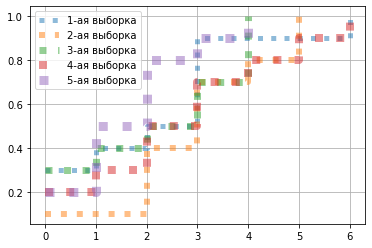

In [5]:
def emperical_poisson(poisson_array):
    x, y = transform_discrete_data(poisson_array)
    emp = y.copy()
    for i in range(len(y)):
        s = np.sum(y[0:i+1])
        emp[i] = s
    x.sort()
    return (x, emp)

for i in range(5):
    x, y = emperical_poisson(poisson_data_10[i])
    plt.step(x, y, where='post', label='{}-ая выборка'.format(i+1), alpha=0.5, ls=':', linewidth=i+5);


plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Poi_Emp_10.pdf')

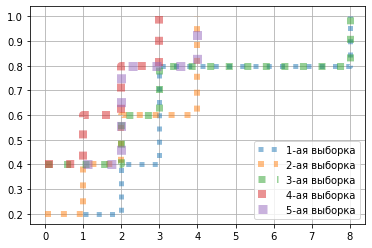

In [6]:
for i in range(5):
    x, y = emperical_poisson(poisson_data_5[i])
    plt.step(x, y, where='post', label='{}-ая выборка'.format(i+1),  alpha=0.5, ls=':', linewidth=i+5);

plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Poi_Emp_5.pdf')

## Построение вариационный ряда выборки

In [7]:
sort_poisson_data_5 = sorted(poisson_data_5[0])
sort_poisson_data_10 = sorted(poisson_data_10[0])
sort_poisson_data_100 = sorted(poisson_data_100[0])
sort_poisson_data_1000 = sorted(poisson_data_1000[0])
sort_poisson_data_100000 = sorted(poisson_data_100k[0])

In [8]:
print('Вариационный ряд для выборки {} --> {}'.format(poisson_data_5[0],sort_poisson_data_5))
print('Вариационный ряд для выборки {} --> {}'.format(poisson_data_10[0],sort_poisson_data_10))

Вариационный ряд для выборки [3 1 2 8 2] --> [1, 2, 2, 3, 8]
Вариационный ряд для выборки [3 0 3 1 2 2 6 3 2 2] --> [0, 1, 2, 2, 2, 2, 3, 3, 3, 6]


## Поиск квантилей для заданного уровня

In [9]:
def poisson_kvantil(emperical_func, level):
    if level<emperical_func[1][0]:
        return 0
    if level>=1:
        return emperical_func[0][-1]
    
    if level not in emperical_func[1]:
        for fr in emperical_func[1]:
            if level < fr:
                near_fr = np.where(emperical_func[1]==fr)[0][0]
                kvantil = emperical_func[0][near_fr]
                return kvantil
            
    if level in emperical_func[1]:
        near_fr = np.where(emperical_func[1]==level)
        kvantil = emperical_func[0][near_fr]+0.5
        return kvantil[0]

In [10]:
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_10[3],0.1,poisson_kvantil(emperical_poisson(poisson_data_10[3]), 0.1)))
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_10[3],0.5,poisson_kvantil(emperical_poisson(poisson_data_10[3]), 0.5)))
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_10[3],0.7,poisson_kvantil(emperical_poisson(poisson_data_10[3]), 0.7)))

Квантиль для выборки [0 2 4 0 3 1 6 4 3 5] уровня 0.1 == 0
Квантиль для выборки [0 2 4 0 3 1 6 4 3 5] уровня 0.5 == 2.5
Квантиль для выборки [0 2 4 0 3 1 6 4 3 5] уровня 0.7 == 3.5


In [11]:
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_5[3],0.1,poisson_kvantil(emperical_poisson(poisson_data_5[3]), 0.1)))
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_5[3],0.5,poisson_kvantil(emperical_poisson(poisson_data_5[3]), 0.5)))
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_5[3],0.7,poisson_kvantil(emperical_poisson(poisson_data_5[3]), 0.7)))

Квантиль для выборки [3 2 3 0 1] уровня 0.1 == 0
Квантиль для выборки [3 2 3 0 1] уровня 0.5 == 1
Квантиль для выборки [3 2 3 0 1] уровня 0.7 == 2


## Полигон частот

In [12]:
def freq_polygon(poisson_array):
    d = {}
    for i in poisson_array:
        if i not in d:
            d[i] = 0
        d[i]+=1
    X = np.zeros(len(d))
    Y = np.zeros_like(X)
    i = 0
    l = len(poisson_array)
    for num, count in d.items():
        X[i] = num
        Y[i] = count/l
        i += 1
    return (X, Y)

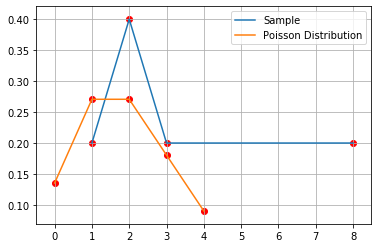

In [13]:
X, Y = freq_polygon(sort_poisson_data_5)
plt.plot(X, Y, label='Sample');
plt.plot(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), label='Poisson Distribution');
plt.scatter(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), color='r', marker='o');
plt.scatter(X, Y, marker='o', color='red');
plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Freq_Pol_5.pdf')

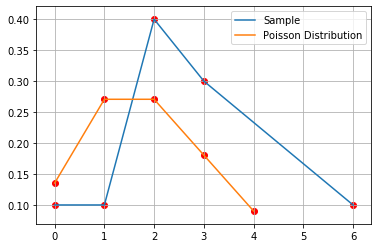

In [14]:
X, Y = freq_polygon(sort_poisson_data_10)
plt.plot(X, Y, label='Sample');
plt.plot(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), label='Poisson Distribution');
plt.scatter(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), color='r', marker='o');
plt.scatter(X, Y, marker='o', color='red');
plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Freq_Pol_10.pdf')

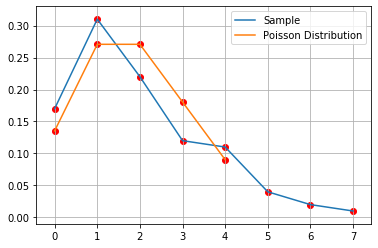

In [15]:
X, Y = freq_polygon(sort_poisson_data_100)
plt.plot(X, Y, label='Sample');
plt.plot(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), label='Poisson Distribution');
plt.scatter(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), color='r', marker='o');
plt.scatter(X, Y, marker='o', color='red');
plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Freq_Pol_100.pdf')

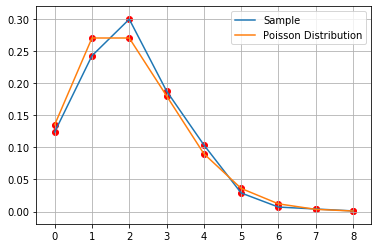

In [16]:
X, Y = freq_polygon(sort_poisson_data_1000)
plt.plot(X, Y, label='Sample');
plt.plot(np.linspace(0,8,9), PoissonDistribution(2, np.linspace(0,8,9)), label='Poisson Distribution');
plt.scatter(np.linspace(0,8,9), PoissonDistribution(2, np.linspace(0,8,9)), color='r', marker='o');
plt.scatter(X, Y, marker='o', color='red');
plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Freq_Pol_1000.pdf')

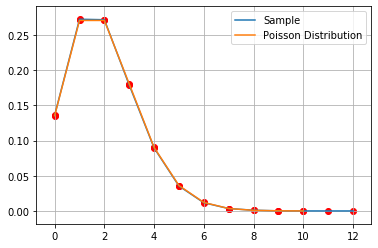

In [17]:
X, Y = freq_polygon(sort_poisson_data_100000)
plt.plot(X, Y, label='Sample');
plt.plot(np.linspace(0,10,11), PoissonDistribution(2, np.linspace(0,10,11)), label='Poisson Distribution');
plt.scatter(np.linspace(0,10,11), PoissonDistribution(2, np.linspace(0,10,11)), color='r', marker='o');
plt.scatter(X, Y, marker='o', color='red');
plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Freq_Pol_100000.pdf')

## Функции для распределения Эрланга

In [18]:
def Erlang_density(m, theta, x):
    '''
    This function makes an array of Erlang probability in given points.
    m&theta - are parametrs of Erlang distribution.
    x - is an array of points on the x-axis.
    Return value: array of density of probability in each point.
    '''
    X = np.array([])
    for i in x:
        X = np.append(X, np.array( (theta**m)/(sps.gamma(m)) *(i**(m-1))*np.exp(-theta*i)))
    
    return X

def random_erlang(k, theta, size=1):
    '''
    This fuction genegates <size> points of Erlang distribution.
    k&theta - are parametrs of Erlang distribution.
    Return value: array with generated points.
    '''
    Erlang_Points = np.zeros(size)
    Exp_Points = np.zeros(k)
    for i in range(size):
        for j in range(k):
            eps = np.random.uniform()
            Exp_Points[j] = -1/theta*np.log(eps)
        S = np.sum(Exp_Points)
        Erlang_Points[i] = S
    Exp_Points = np.sort(Exp_Points)
    return Erlang_Points

def transform_cont_data(erlang_array, split_point):
    '''
    This function transforms DataFrame processing points of Erlang destibution. She splits break with \
    split_points for uniform areas and counts how many points come in each area.
    Erlang_array - is an array, that includes some points.
    Return value: pd.DataFrame
    '''
    max_el = int(np.max(erlang_array)+1)
    steps = np.array([(i,i+1) for i in np.arange(0, max_el, split_point)])
    size = erlang_array.shape[0]
    X = np.arange(1, max_el+1, split_point)
    Y = np.zeros_like(X, dtype='f8')
    j=0
    for i in steps:
        x1 = erlang_array[erlang_array<i[1]]
        x2 = erlang_array[erlang_array>i[0]]
        x = np.intersect1d(x1, x2, assume_unique=True)
        Y[j] = x.shape[0]/size
        j+=1
    return pd.DataFrame(pd.Series(Y, index=X), columns=['''p(x)'''])

## Построим дискретные выборки для $$n \in \{5, 10, 100, 1000, 10^5\}$$ $$k = 2, \lambda =0.2$$

In [19]:
erlang_data_5 = [random_erlang(2, 0.2, 5) for i in range(5)]
erlang_data_10 = [random_erlang(2, 0.2, 10) for i in range(5)]
erlang_data_100 = [random_erlang(2, 0.2, 100) for i in range(5)]
erlang_data_1000 = [random_erlang(2, 0.2, 1000) for i in range(5)]
erlang_data_100k = [random_erlang(2, 0.2, 100000) for i in range(5)]

In [20]:
for i in range(5):
    print('Выборка для n = 5 №', i+1)
    print(erlang_data_5[i])
for i in range(5):
    print('Выборка для n = 10 №', i+1)
    print(erlang_data_10[i])

Выборка для n = 5 № 1
[ 9.45819148  6.06265856 10.02479975  3.7951828   1.51337643]
Выборка для n = 5 № 2
[15.13772436  3.53938647  5.84333361  4.1926706  19.10778656]
Выборка для n = 5 № 3
[18.28558574  2.79934692  6.27134707 17.04141187 15.77554514]
Выборка для n = 5 № 4
[ 1.30148362  2.80649906 15.47504323  7.81896157  7.34531201]
Выборка для n = 5 № 5
[24.10758928 18.09357354  5.63738359 31.47301714  4.10565083]
Выборка для n = 10 № 1
[ 8.42350742  2.73399379 14.10268608  1.53831017  5.71737093 11.41584838
 21.63818845  1.58078073  7.2479781   2.55635853]
Выборка для n = 10 № 2
[ 6.44870446  3.42360077 24.50817878  3.13626106  8.85773267  5.23808776
  6.78203382  4.260151   24.73360831 18.72982792]
Выборка для n = 10 № 3
[ 0.4260681   3.99820559  7.83853029 14.39560635  4.35872605  4.25096773
 10.4138346  12.27762249  4.84261996  5.84469517]
Выборка для n = 10 № 4
[ 5.73868925  2.33737155  6.56375473 16.85976581 26.75301656  0.52827913
 15.30356758 10.56805769  7.66686851 20.536135

## Построение выброчного ряда

In [21]:
sort_erlang_data_5 = np.array(sorted(erlang_data_5[0]))
sort_erlang_data_10 = np.array(sorted(erlang_data_10[0]))
sort_erlang_data_100 = np.array(sorted(erlang_data_100[0]))
sort_erlang_data_1000 = np.array(sorted(erlang_data_1000[0]))
sort_erlang_data_100k = np.array(sorted(erlang_data_100k[0]))

In [22]:
print('Вариационный ряд для выборки {} --> {}'.format(erlang_data_5[0],sort_erlang_data_5))
print('Вариационный ряд для выборки {} --> {}'.format(erlang_data_10[0],sort_erlang_data_10))

Вариационный ряд для выборки [ 9.45819148  6.06265856 10.02479975  3.7951828   1.51337643] --> [ 1.51337643  3.7951828   6.06265856  9.45819148 10.02479975]
Вариационный ряд для выборки [ 8.42350742  2.73399379 14.10268608  1.53831017  5.71737093 11.41584838
 21.63818845  1.58078073  7.2479781   2.55635853] --> [ 1.53831017  1.58078073  2.55635853  2.73399379  5.71737093  7.2479781
  8.42350742 11.41584838 14.10268608 21.63818845]


## Построение эмпирической функции

In [23]:
def emperical_erlang(erlang_array, split_point):
    sorted(erlang_array)
    max_el = int(np.max(erlang_array)+1)
    steps = np.array([(i,i+1) for i in np.arange(0, max_el+1, split_point)])
    X = np.zeros(len(steps))
    Y = np.zeros_like(X)
    size = erlang_array.shape[0]
    j=0
    for i in steps:
        x1 = erlang_array[erlang_array<i[1]]
        x2 = erlang_array[erlang_array>i[0]]
        x = np.intersect1d(x1, x2, assume_unique=True)
        if x.shape[0] != 0:
            X[j] = i[0]
            Y[j] = np.sum(Y[j-1])+x.shape[0]/size
        else:
            X[j] = i[0]
            Y[j] = Y[j-1]
        j+=1
    return (X, Y)

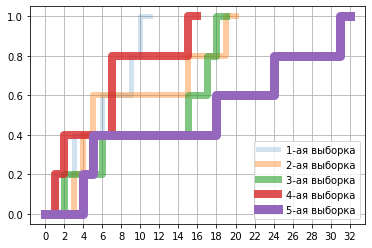

In [34]:
for i in range(5):
    x, y = emperical_erlang(erlang_data_5[i], 1)
    plt.step(x, y, where='post',  alpha=(i+1)/5, ls='-', linewidth=i+5, label='{}-ая выборка'.format(i+1));
plt.grid();
mx = 0
for i in range(5):
    m = np.max(erlang_data_5[i])
    if m>mx:
        mx = m
mx = int(mx+1)
if mx%2==1:
    mx+=1
plt.xticks(np.linspace(0,mx, int(mx/2)+1))
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Emp_Erlang_5.pdf')

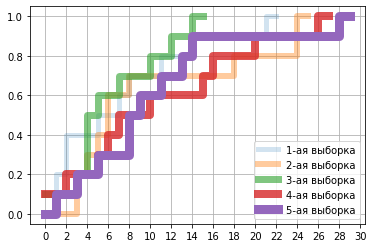

In [33]:
for i in range(5):
    x, y = emperical_erlang(erlang_data_10[i], 1)
    plt.step(x, y, where='post',  alpha=(i+1)/5, ls='-', linewidth=i+5, label='{}-ая выборка'.format(i+1));
plt.grid();
mx = 0
for i in range(5):
    m = np.max(erlang_data_10[i])
    if m>mx:
        mx = m
mx = int(mx+1)
if mx%2==1:
    mx+=1
plt.xticks(np.linspace(0,mx, int(mx/2)+1))
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Emp_Erlang_10.pdf')

## Квантили

In [138]:
emperical_erlang(erlang_data_10[4],1)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29.]),
 array([0. , 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.5, 0.6, 0.6, 0.7, 0.7,
        0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
        0.9, 0.9, 1. , 1. ]))

In [140]:
def erlang_kvantil(emperical_func, level):
    if level<emperical_func[1][0]:
        return 0
    if level>=1:
        return emperical_func[0][-1]

    first_kvan = np.where(emperical_func[1]<=level+0.01)
    last_kvan = np.where(emperical_func[1]>(level-0.01))
    kvan_inds = np.intersect1d(first_kvan, last_kvan)
    if kvan_inds.shape[0] ==0:
        for fr in emperical_func[1]:
            if level < fr:
                near_fr = np.where(emperical_func[1]==fr)[0][0]
                kvantil = emperical_func[0][near_fr]

                return kvantil
    first_kvan = kvan_inds[0]
    last_kvan = kvan_inds[-1]

    kvantil = (emperical_func[0][first_kvan]+emperical_func[0][last_kvan])/2

    return kvantil

In [144]:
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_5[3], 0.1, erlang_kvantil(emperical_erlang(erlang_data_5[1],1), 0.1)))
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_5[3], 0.5, erlang_kvantil(emperical_erlang(erlang_data_5[1],1), 0.5)))
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_5[3], 0.7, erlang_kvantil(emperical_erlang(erlang_data_5[1],1), 0.7)))

Квантиль для выборки [ 1.30148362  2.80649906 15.47504323  7.81896157  7.34531201] уровня 0.1 = 3.0
Квантиль для выборки [ 1.30148362  2.80649906 15.47504323  7.81896157  7.34531201] уровня 0.5 = 5.0
Квантиль для выборки [ 1.30148362  2.80649906 15.47504323  7.81896157  7.34531201] уровня 0.7 = 15.0


In [145]:
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_10[4], 0.1, erlang_kvantil(emperical_erlang(erlang_data_10[4],1), 0.1)))
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_10[4], 0.5, erlang_kvantil(emperical_erlang(erlang_data_10[4],1), 0.5)))
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_10[4], 0.7, erlang_kvantil(emperical_erlang(erlang_data_10[4],1), 0.7)))

Квантиль для выборки [ 9.02770023 28.94668457  3.10929781 13.83457346  1.22763611 11.26452997
  8.32525049 14.16950039  5.91072393  8.57862944] уровня 0.1 = 1.5
Квантиль для выборки [ 9.02770023 28.94668457  3.10929781 13.83457346  1.22763611 11.26452997
  8.32525049 14.16950039  5.91072393  8.57862944] уровня 0.5 = 8.0
Квантиль для выборки [ 9.02770023 28.94668457  3.10929781 13.83457346  1.22763611 11.26452997
  8.32525049 14.16950039  5.91072393  8.57862944] уровня 0.7 = 11.5


## Гистограмма частот

In [26]:
def hist_freq(erlang_array, split_point):
    max_el = int(np.max(erlang_array)+1)
    steps = np.array([(i,i+1) for i in np.arange(0, max_el, split_point)])
    X = np.arange(1, max_el+1, split_point)
    Y = np.zeros_like(X)
    size = erlang_array.shape[0]
    j=0
    for i in steps:
        x1 = erlang_array[erlang_array<i[1]]
        x2 = erlang_array[erlang_array>i[0]]
        x = np.intersect1d(x1, x2, assume_unique=True)
        Y[j] = x.shape[0]/size
        j+=1
    return (X, Y)

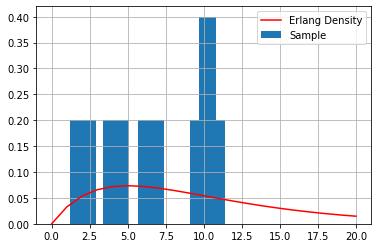

In [27]:
X, Y = hist_freq(sort_erlang_data_5, 0.1)
plt.bar(X, Y, label='Sample');
x = np.linspace(0, 20, 21)
plt.plot(x, Erlang_density(2,0.2,x), label='Erlang Density', color='red');
plt.grid();
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Hist_Erlang_5.pdf')

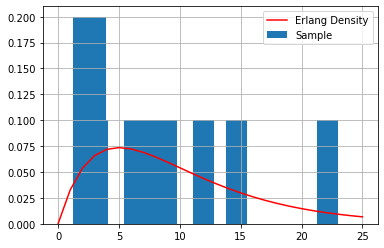

In [28]:
X, Y = hist_freq(sort_erlang_data_10, 0.1)
plt.bar(X, Y, label='Sample');
x = np.linspace(0, 25, 26)
plt.plot(x, Erlang_density(2,0.2,x), label='Erlang Density', color='red');
plt.grid();
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Hist_Erlang_10.pdf')

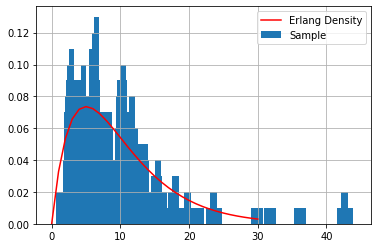

In [29]:
X, Y = hist_freq(sort_erlang_data_100, 0.1)
plt.bar(X, Y, label='Sample');
x = np.linspace(0, 30, 31)
plt.plot(x, Erlang_density(2,0.2,x), label='Erlang Density', color='red');
plt.grid();
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Hist_Erlang_100.pdf')

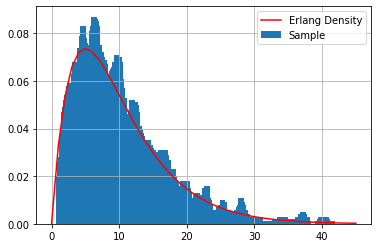

In [30]:
X, Y = hist_freq(sort_erlang_data_1000, 0.1)
plt.bar(X, Y, label='Sample');
x = np.linspace(0, 45, 46)
plt.plot(x, Erlang_density(2,0.2,x), label='Erlang Density', color='red');
plt.grid();
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Hist_Erlang_1000.pdf')

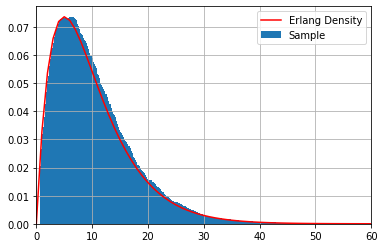

In [31]:
X, Y = hist_freq(sort_erlang_data_100k, 0.1)
plt.bar(X, Y, label='Sample');
x = np.linspace(0, 60, 61)
plt.plot(x, Erlang_density(2,0.2,x), label='Erlang Density', color='red');
plt.grid();
plt.xlim(0,60);
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Hist_Erlang_100k.pdf')